# Table of Contents
### 1.  Explanation of Problem
### 2.  Import Libraries and Data
### 3.  Separate and Clean up Data
### 4.  Visualize Data
### 5.  Modelling Data
### 6.  Testing Model
### 7.   Reflection and Improvements for the Future

## 1.0 Explanation of Problem

For this machine learning project, we are provided with a lot of data for different houses. With this data, our goal is to estimate house prices (our output).

The data included is both numerical (i.e. continuous) and categorical (i.e. a certain category).

## 2.0 Import Data and Libraries

In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Data Manipulation and stograge Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization Libraries
import seaborn as sns # visualizing data
import matplotlib.pyplot as plt

# Modelling Libraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv']


In [31]:
# Get the data with pandas

data_train = pd.read_csv('./input/train.csv')
data_test = pd.read_csv('./input/test.csv')

data_train.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We can see there are many different features, so to make this more manageable I will split these into about 8 separate dataframes (10 features per data frame for 7 and 11 features for the 8th). This way I can more easily manage and analyze them.

In [32]:

train_1 = data_train.iloc[:,:10]
train_2 = data_train.iloc[:,10:20]      #  for column part      (column num inlucded):(column num not included)
train_3 = data_train.iloc[:,20:30]
train_4 = data_train.iloc[:,30:40]
train_5 = data_train.iloc[:,40:50]
train_6 = data_train.iloc[:,50:60]
train_7 = data_train.iloc[:,60:70]
train_8 = data_train.iloc[:,70:81]

len(train_8.columns)+len(train_7.columns)+len(train_6.columns)+len(train_5.columns)+len(train_4.columns)+len(train_3.columns)+len(train_2.columns)+len(train_1.columns)

##len(train_2.columns)

#train_3.head()

#data_train.iloc[:,:0].head()

print(data_train.shape)

(1460, 81)


In [33]:
# Now let's analyze each of these sub dataframes separately

train_1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub


From the above we can see that Id is not useful information as it just numbers each different row. This can be discarded.

These are the following descriptions for the other features as provided:

**2nd Feature**

MSSubClass: Identifies the type of dwelling involved in the sale.	

                        20	1-STORY 1946 & NEWER ALL STYLES
                        30	1-STORY 1945 & OLDER
                        40	1-STORY W/FINISHED ATTIC ALL AGES
                        45	1-1/2 STORY - UNFINISHED ALL AGES
                        50	1-1/2 STORY FINISHED ALL AGES
                        ....
                        ....
                        ....
This is essentialy a categorical feature so it will have to be split up using  pd.get_dummies

*Categorical*                          16 Categories

**3rd Feature**

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density

Similar to before, it is a categorical feature. Use pd.get_dummies

*Categorical*                    5 Categories

**4th Feature**

LotFrontage: Linear feet of street connected to property

we can leave this as is, it is a continuous variable

**5th Feature**

LotArea: Lot size in square feet

Again, leave as is. Continuous variable.

**6th Feature**

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       
*Categorical*                  2 Categories

**7th Feature**

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
*Categorical*                    3 Categories

**8th Feature**

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

*Categorical*                     4 Categories

**9th Feature**

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

*Categorical*                      4 Categories

**10th Feature**

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only
       
*Categorical*                       4 Categories



After performing feature engineering on these, Train_1 should have a total of 38 features (i.e. columns of data)

The data was analyed in an excel sheet similar to how I described above and using some tricks with excel i generated a list of columns to which a feature was either categorical or numerical. These arrays can be found below.


## 3.0 Separate and Clean Up Data

In [34]:
Categorical = [1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 35, 39, 40, 41, 42, 53, 55, 57, 58, 60, 63, 64, 65, 72, 73, 74, 78, 79]

Numerical = [3, 4, 17, 18, 19, 20, 26, 34, 36, 37, 38, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56, 59, 61, 62,66, 67, 68, 69, 70, 71, 75, 76, 77]

# Note I removed 80 from Numerical because that is the output y

Data_y = data_train['SalePrice']

Data_y.head()

print("Number of Categorical Features:\t",len(Categorical))
print("Number of Numerical Features:\t",len(Numerical))


Number of Categorical Features:	 44
Number of Numerical Features:	 35


Next, we will check which numerical features need to be imputed. For now I'll just replace it with the mean. I personally don't think this is good as final solution, but I will use it for the time being. 

In [35]:
Numerical_Data = (data_train.iloc[:,Numerical])


# This next piece of code will tell us if any of the columns have missing values

print("Are there any NaN Values?:\t",Numerical_Data.isnull().any().any())

print(Numerical_Data.isnull().mean())

# Turns out there is, so we will have to impute these results



Are there any NaN Values?:	 True
LotFrontage      0.177397
LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
MasVnrArea       0.005479
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageYrBlt      0.055479
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
dtype: float64


In [36]:
Numerical_Data = Numerical_Data.fillna(Numerical_Data.mean())         # need to add inplace, otherwise a new object will be created 

print("Are there any NaN Values?:\t",Numerical_Data.isna().any().any())                                          # it worked! all good

Are there any NaN Values?:	 False


Now that we have fixed up the numerical data with imputation, it is time to make the categorical data more useful by splitting them up into dummies (i.e. binary numeric system)

In [37]:
# Now it is time split up each categorical feature using get_dummies
Categorical_list = []
Categorical_Data = pd.DataFrame()

for col in Categorical:
    temp = pd.DataFrame( data = data_train.iloc[:,[col]], dtype = 'object')              # needed to make them objects otherwise columns with integers won't work with get_dummies
    temp = pd.get_dummies(data = temp)
    Categorical_list.append(temp)        # pandas concat takes a list of dataframes

    
Categorical_Data = pd.concat(Categorical_list, axis=1)

print("Total Number of Unique Categories in Categorical_Data:    ",len(Categorical_Data.columns))

print("Total Number of Unique Categories in the list:    ",(data_train.iloc[:,Categorical]).nunique().sum())


    

Total Number of Unique Categories in Categorical_Data:     267
Total Number of Unique Categories in the list:     267


Alright! That was quite the hassle! 

Now it is time to visualize some of this data to see if the features are useful to us or not.

## 4.0 Visualize Data

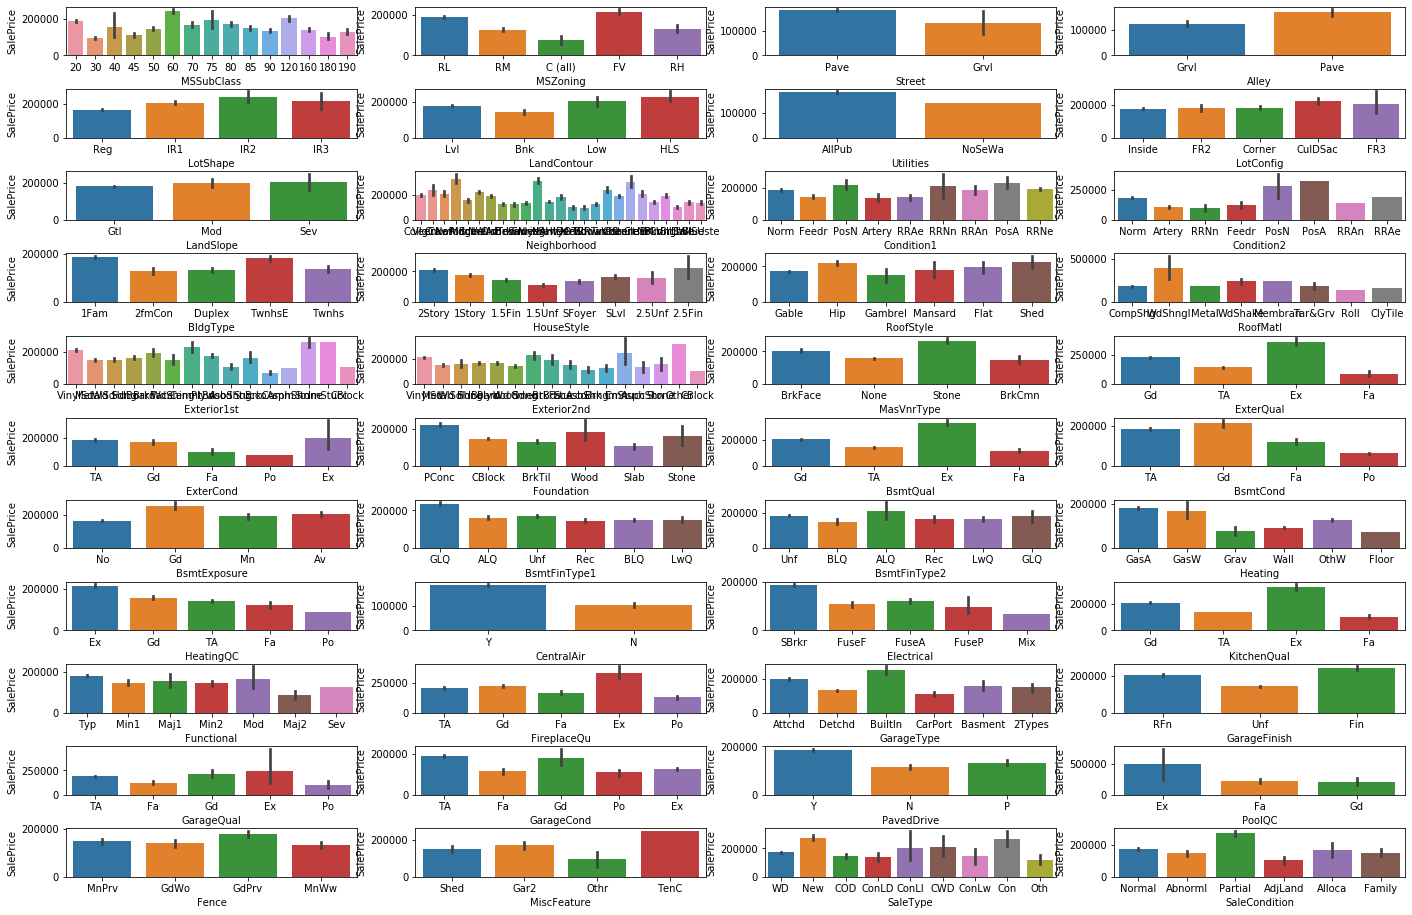

In [38]:
df = pd.DataFrame(data_train.iloc[:,Categorical])

fig, axarr = plt.subplots(11, 4, figsize=(24,16 ))         #total of 44 plots for each categorical dataset

y = 0
x = 0
count = 1


for x in range(11):      # 0,1,2,3,4,5,6,...,11
    for y in range(4):   # 0,1,2,3
        
        temp =  df.iloc[:,(x*4+y)]
        
        sns.barplot(x=temp,y=Data_y,ax=axarr[x][y])
        plt.subplots_adjust(hspace = 0.7)
        

Great! Now we have a way to visualise all of our categorical data. What we want to see here is that categories within each figure actually cause differing outputs (i.e. saleprice). This means that the sale price in some way depends on these variables, otherwise they are nto useful to have in our model.

We can notive that the 9th figure (Row 3, Column 1) there isn't much difference in sale price for each category. Therefore this may not be helpful to have in our model.

Now let's visualize the numerical data.

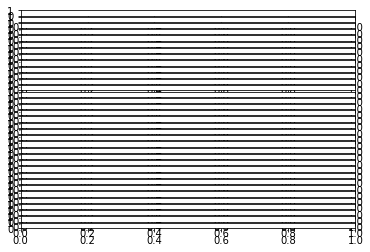

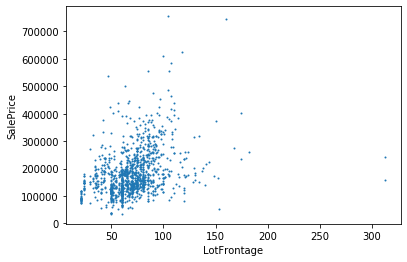

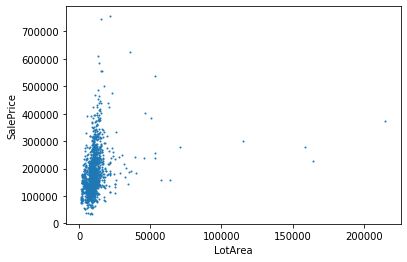

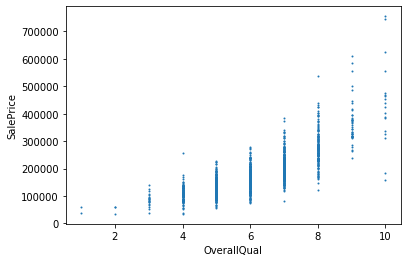

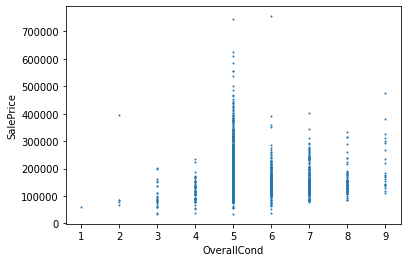

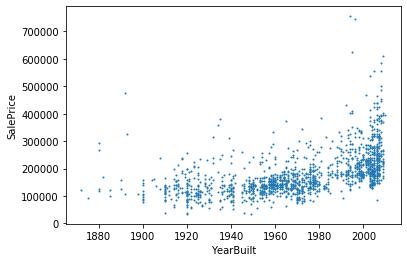

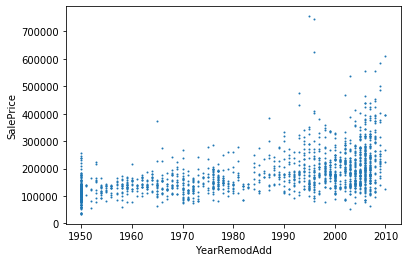

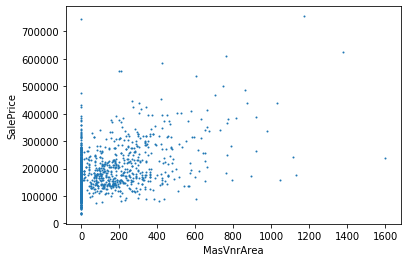

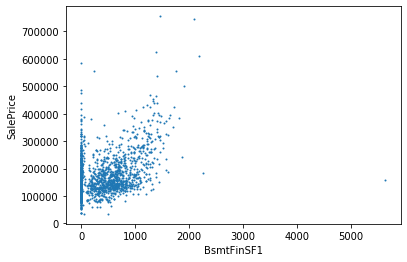

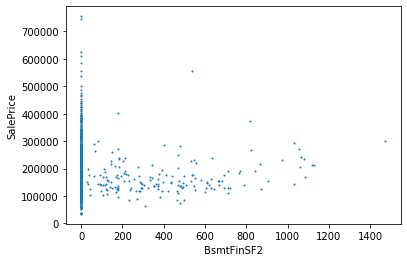

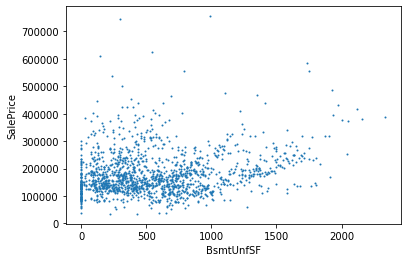

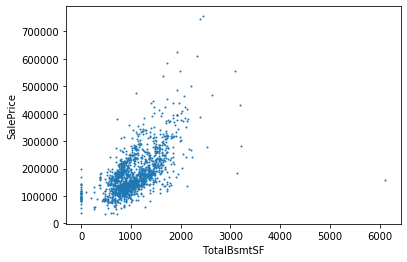

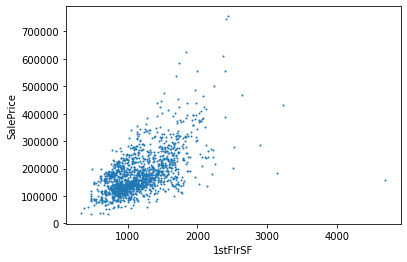

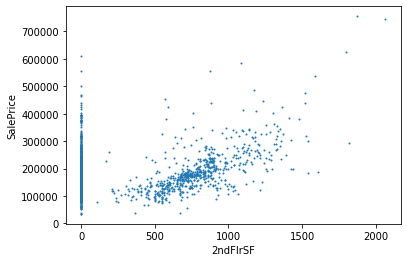

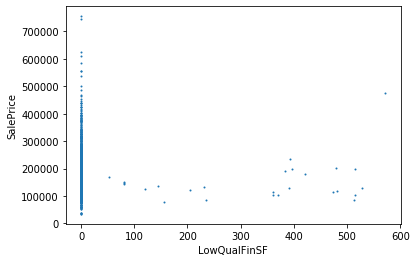

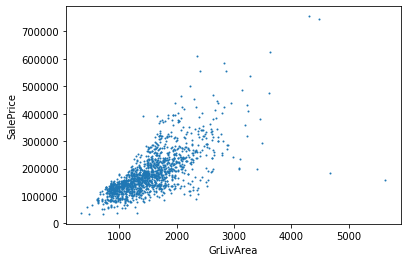

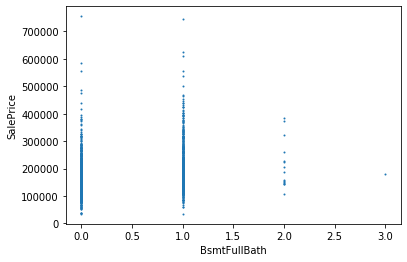

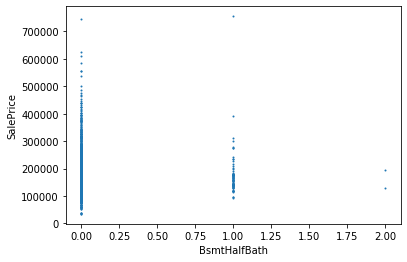

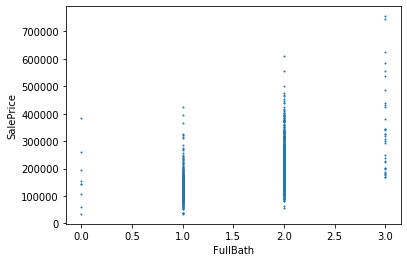

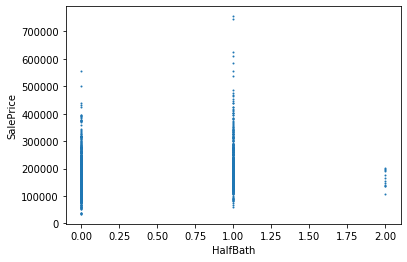

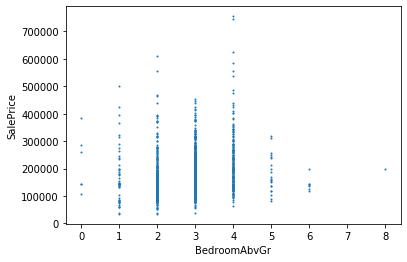

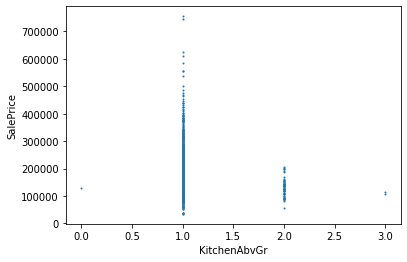

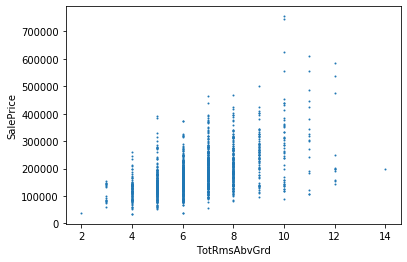

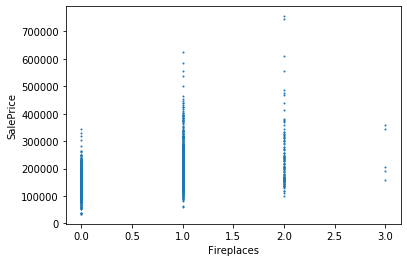

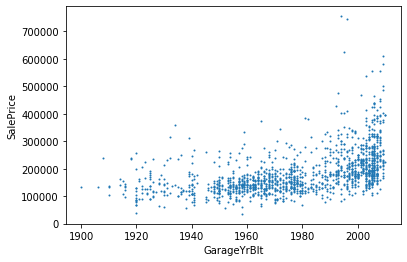

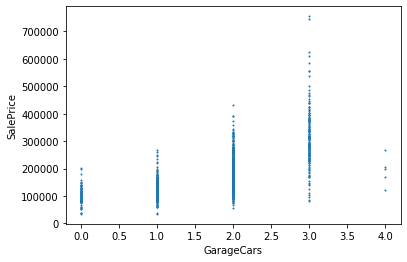

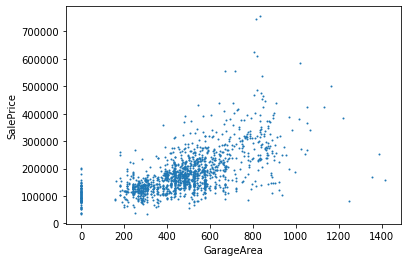

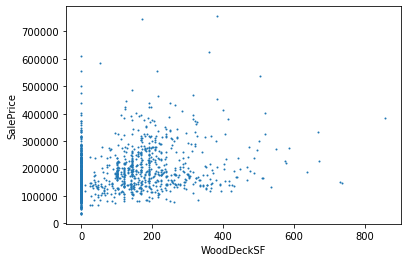

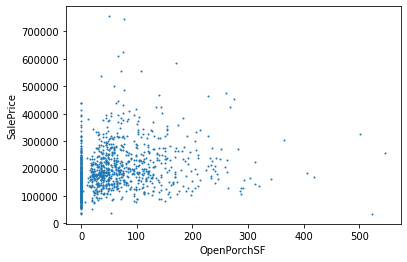

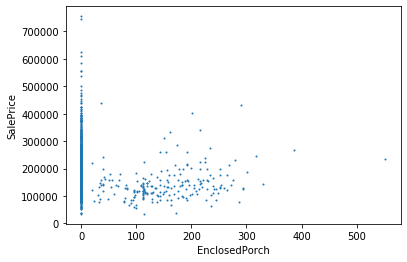

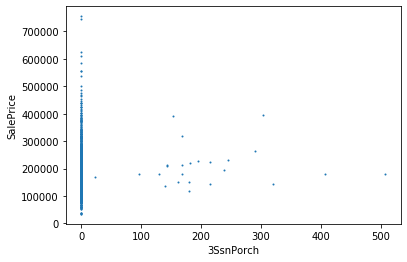

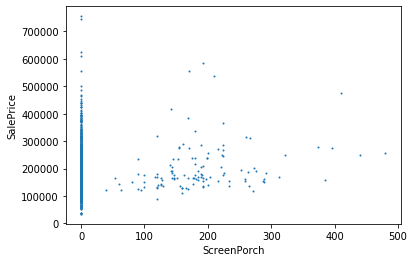

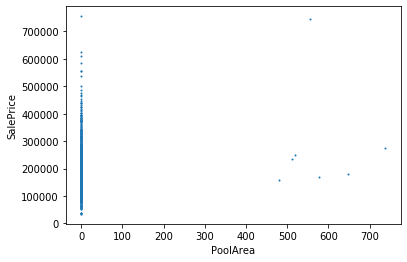

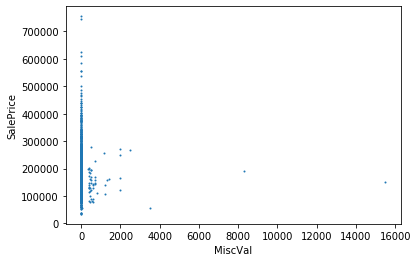

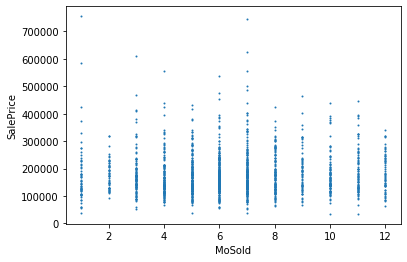

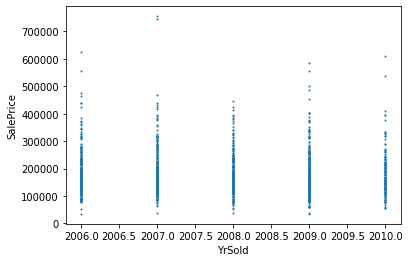

In [39]:
df = pd.DataFrame(data_train.iloc[:,Numerical])

#fig, axs = plt.subplots(35, 1, 1)         #total of 44 plots for each categorical dataset

fig, axes = plt.subplots(nrows = 35, ncols = 1)

for x in range(35):      # 0,1,2,3,4,5,6,...,11
        
        temp =  pd.DataFrame(df.iloc[:,(x)])
        title = str(temp.columns[0])
        temp.sort_values(by=[0],axis = 1, ascending=True,inplace=True)
        
        #srs = [temp,Train_y]
        
        #temp = pd.concat(srs)
        
        #axes[x+1,1].scatter(temp,Train_y)
        plt.figure(x)
        plt.scatter(temp.values,Data_y.values,s=1)
        plt.xlabel(temp.columns[0])
        plt.ylabel('SalePrice')
        #plt.locator_params(axis='x', nticks=5)
        plt.show()
    

From the data above, we can see that some of these graphs show a general trend as the variables go up (OverallQual, YearBuilt), while some are semmingly constant (3SsnPorch).

It would be best to elimiate the features that, with increase, do not change the output (i.e. sale price).

Let's also look at a heatmap of our numerical data to see which variables are collinear and which have a high correleation with the SalePrice.

Looking below, we see that the feature that has the highest correltion with SalePrice is OveralQual.

Additionally, features:         YearBuilt & GarageYrBlt, BsmtFinSF1 & BsmtFullBath, TotRmsAbvGrd & GrdLivArea   also have a high correlation with each other. Using some models such as Lasso Regression will also perform feature selection and remove 1 feature from each highly correleated pair (or higher order grouping).

However, we could also remove some of these highly correleated features by choosing only the one that has a higher correleation with the SalePrice.

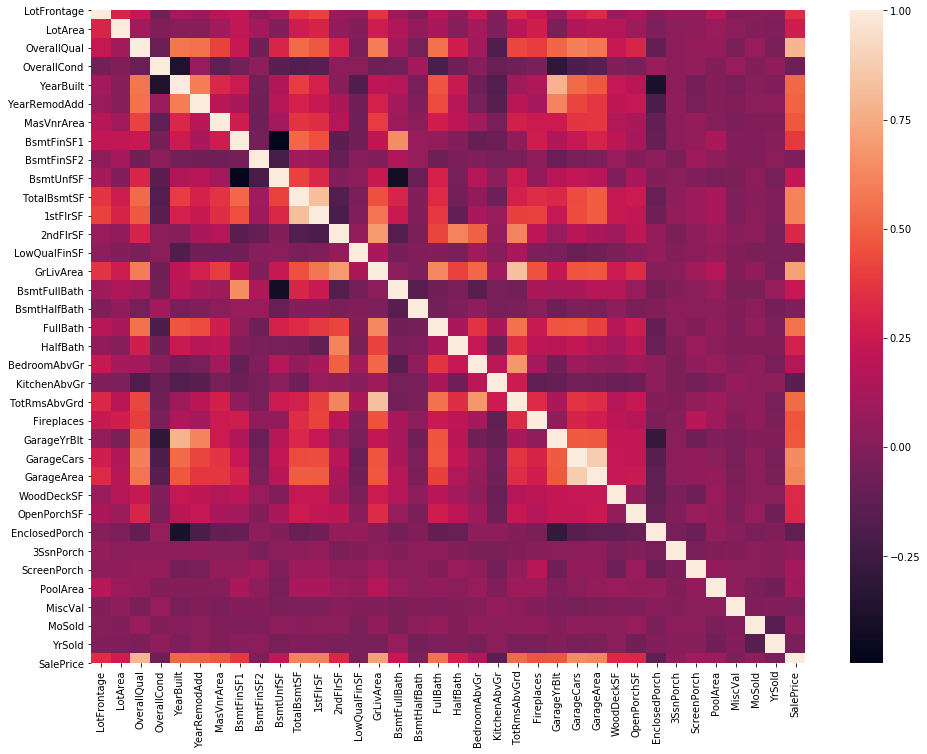

In [40]:
f, ax = plt.subplots(figsize=(16, 12))

corr = pd.concat([Numerical_Data,Data_y],axis=1)
corr = corr.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           ax = ax)

Now it is time to actually try out our training data on our different models and see how well they generalize in the cross validation set!

As a reminder, we have the two following dataframes to represent our training data:
    
   Numerical_Data
   Categorical_Data
    
Let's combine both of these so that we have a Train_X dataframe.

Then we can pass Train_X and Train_y into some models.
    
    

## 5.0 Modelling Data

In [41]:
temp = pd.concat([Numerical_Data,Categorical_Data],axis = 1)

print('Numerical and Categorical Shape:   ', temp.shape)      # should be 35+267 = 302 columns

print('Y Data Shape:   ', Data_y.shape)

#from sklearn.utils import shuffle

#temp = shuffle(temp)

Train_X, CV_X, Train_y, CV_y = train_test_split(temp, Data_y, test_size=0.33, random_state=42)

print('Train X Shape:   ', Train_X.shape)
print('Train y Shape:   ', Train_y.shape)
      
print('CV X Shape:   ', CV_X.shape)
print('CV y Shape:   ', CV_y.shape)


# OK, all data is now ready!



Numerical and Categorical Shape:    (1460, 302)
Y Data Shape:    (1460,)
Train X Shape:    (978, 302)
Train y Shape:    (978,)
CV X Shape:    (482, 302)
CV y Shape:    (482,)


Time to try our Cross Validation Data on the model

In [42]:
#      Linear Regression


#for j in range(-15,7):

 #   alpha = 10**(j)

        

model = linear_model.LinearRegression()
model.fit(Train_X,Train_y)

new = model.predict(CV_X)
        
print("Mean Error:   ",np.mean(abs(CV_y-new)),"\t", "Score:    ", model.score(CV_X,CV_y))

Mean Error:    19069.538630517116 	 Score:     0.8677289580651524


In [43]:
# Ridge Regression


for j in range(-15,7):

        alpha = 10**(j)

        model = linear_model.Ridge(alpha = alpha)
        model.fit(Train_X,Train_y)

        temp = model.predict(CV_X)

        
        print("Alpha:   ",alpha,",\t","Mean Error:   ",np.mean(abs(CV_y-temp)),"\t", "Score:    ", model.score(CV_X,CV_y))
   
    

Alpha:    1e-15 ,	 Mean Error:    19069822.47591723 	 Score:     -2228588.4981050803
Alpha:    1e-14 ,	 Mean Error:    1923710.6290258353 	 Score:     -22290.67923864004
Alpha:    1e-13 ,	 Mean Error:    209097.38396988003 	 Score:     -222.60820145176208
Alpha:    1e-12 ,	 Mean Error:    19063.875468549177 	 Score:     0.8677237620994296
Alpha:    1e-11 ,	 Mean Error:    19069.092618990868 	 Score:     0.8677271852203816


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.49247e-24): result may not be accurate.
  overwrite_a=True).T
c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.09699e-23): result may not be accurate.
  overwrite_a=True).T


Alpha:    1e-10 ,	 Mean Error:    19132.76477638946 	 Score:     0.8668834253415822
Alpha:    1e-09 ,	 Mean Error:    19069.529534495687 	 Score:     0.8677289846957205
Alpha:    1e-08 ,	 Mean Error:    19069.538665174518 	 Score:     0.867728954131039
Alpha:    1e-07 ,	 Mean Error:    19069.53734441474 	 Score:     0.867728979714671
Alpha:    1e-06 ,	 Mean Error:    19069.526768628122 	 Score:     0.8677291709746752
Alpha:    1e-05 ,	 Mean Error:    19069.420118229697 	 Score:     0.8677310865653352
Alpha:    0.0001 ,	 Mean Error:    19068.35422409176 	 Score:     0.8677502158188353
Alpha:    0.001 ,	 Mean Error:    19057.817264455258 	 Score:     0.867938840543307
Alpha:    0.01 ,	 Mean Error:    18960.275476049686 	 Score:     0.8695838057000026


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.16511e-21): result may not be accurate.
  overwrite_a=True).T
c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.53585e-20): result may not be accurate.
  overwrite_a=True).T
c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.16536e-19): result may not be accurate.
  overwrite_a=True).T
c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.16552e-18): result may not be accurate.
  overwrite_a=True).T
c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditione

Alpha:    0.1 ,	 Mean Error:    18795.131362962245 	 Score:     0.8745787105396603
Alpha:    1 ,	 Mean Error:    19832.662072457908 	 Score:     0.8608001627369488
Alpha:    10 ,	 Mean Error:    19636.07628247616 	 Score:     0.8479673273737806
Alpha:    100 ,	 Mean Error:    19368.48411953012 	 Score:     0.8316557848349613
Alpha:    1000 ,	 Mean Error:    22045.221535205463 	 Score:     0.7877715463691408
Alpha:    10000 ,	 Mean Error:    25013.486507436588 	 Score:     0.7477738055706378
Alpha:    100000 ,	 Mean Error:    25178.092383908694 	 Score:     0.7447584095265047
Alpha:    1000000 ,	 Mean Error:    25387.110965367014 	 Score:     0.752179394789026


In [44]:
# Lasso Regression

# This also has variable selection

for j in range(-15,7):

        alpha = 10**(j)

        model = linear_model.Lasso(alpha = alpha)
        model.fit(Train_X,Train_y)

        temp = model.predict(CV_X)

        
        print("Alpha:   ",alpha,",\t","Mean Error:   ",np.mean(abs(CV_y-temp)),"\t", "Score:    ", model.score(CV_X,CV_y))
   
    



c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173024082149.94104, tolerance: 566931384.728802
  positive)


Alpha:    1e-15 ,	 Mean Error:    19043.374978718242 	 Score:     0.8674809897601943


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173024082149.93958, tolerance: 566931384.728802
  positive)


Alpha:    1e-14 ,	 Mean Error:    19043.374978718304 	 Score:     0.8674809897601936


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173024082149.9168, tolerance: 566931384.728802
  positive)


Alpha:    1e-13 ,	 Mean Error:    19043.374978718537 	 Score:     0.8674809897601882


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173024082149.70383, tolerance: 566931384.728802
  positive)


Alpha:    1e-12 ,	 Mean Error:    19043.37497872101 	 Score:     0.8674809897601341


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173024082147.5668, tolerance: 566931384.728802
  positive)


Alpha:    1e-11 ,	 Mean Error:    19043.374978746182 	 Score:     0.8674809897595911


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173024082126.19742, tolerance: 566931384.728802
  positive)


Alpha:    1e-10 ,	 Mean Error:    19043.374978997796 	 Score:     0.8674809897541604


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173024081912.50156, tolerance: 566931384.728802
  positive)


Alpha:    1e-09 ,	 Mean Error:    19043.37498151331 	 Score:     0.8674809896998636


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173024079775.54306, tolerance: 566931384.728802
  positive)


Alpha:    1e-08 ,	 Mean Error:    19043.37500666899 	 Score:     0.8674809891568827


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173024058405.95654, tolerance: 566931384.728802
  positive)


Alpha:    1e-07 ,	 Mean Error:    19043.375258225973 	 Score:     0.8674809837270652


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173023844709.65155, tolerance: 566931384.728802
  positive)


Alpha:    1e-06 ,	 Mean Error:    19043.3777737958 	 Score:     0.867480929427958


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173021707703.7398, tolerance: 566931384.728802
  positive)


Alpha:    1e-05 ,	 Mean Error:    19043.40292949393 	 Score:     0.8674803863436823


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173000333360.20984, tolerance: 566931384.728802
  positive)


Alpha:    0.0001 ,	 Mean Error:    19043.6544864751 	 Score:     0.867474946180665


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172828038891.48984, tolerance: 566931384.728802
  positive)


Alpha:    0.001 ,	 Mean Error:    19044.05646561168 	 Score:     0.8674706826700892


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172866757099.05136, tolerance: 566931384.728802
  positive)


Alpha:    0.01 ,	 Mean Error:    19028.75850726544 	 Score:     0.8678772049491361


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164836147897.83377, tolerance: 566931384.728802
  positive)


Alpha:    0.1 ,	 Mean Error:    18890.271731876335 	 Score:     0.8707395778168403


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162243431039.31393, tolerance: 566931384.728802
  positive)


Alpha:    1 ,	 Mean Error:    18620.16120151415 	 Score:     0.8744647946072448
Alpha:    10 ,	 Mean Error:    17569.010780584813 	 Score:     0.8886752949720883
Alpha:    100 ,	 Mean Error:    17277.99827175922 	 Score:     0.8831741556350868
Alpha:    1000 ,	 Mean Error:    21001.714847646566 	 Score:     0.8127705455644161
Alpha:    10000 ,	 Mean Error:    24027.358847300413 	 Score:     0.7625764003895977
Alpha:    100000 ,	 Mean Error:    24800.424491394082 	 Score:     0.7568441609416244
Alpha:    1000000 ,	 Mean Error:    28569.621608470214 	 Score:     0.7194823628587348


In [45]:
#   Elastic Net Regression
for j in range(-15,7):

        alpha = 10**(j)

        model = linear_model.ElasticNet(alpha = alpha)
        model.fit(Train_X,Train_y)

        temp = model.predict(CV_X)

        
        print("Alpha:   ",alpha,",\t","Mean Error:   ",np.mean(abs(CV_y-temp)),"\t", "Score:    ", model.score(CV_X,CV_y))
   




c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173024082150.1127, tolerance: 566931384.728802
  positive)


Alpha:    1e-15 ,	 Mean Error:    19043.374978791628 	 Score:     0.8674809897606272


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173024082151.65158, tolerance: 566931384.728802
  positive)


Alpha:    1e-14 ,	 Mean Error:    19043.3749794516 	 Score:     0.8674809897645281


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173024082167.04446, tolerance: 566931384.728802
  positive)


Alpha:    1e-13 ,	 Mean Error:    19043.374986052175 	 Score:     0.8674809898035303


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173024082320.9759, tolerance: 566931384.728802
  positive)


Alpha:    1e-12 ,	 Mean Error:    19043.37505205738 	 Score:     0.8674809901935611


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173024083860.28375, tolerance: 566931384.728802
  positive)


Alpha:    1e-11 ,	 Mean Error:    19043.375712102432 	 Score:     0.8674809940939036


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173024099253.11304, tolerance: 566931384.728802
  positive)


Alpha:    1e-10 ,	 Mean Error:    19043.38231184471 	 Score:     0.867481033101916


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173024253156.9591, tolerance: 566931384.728802
  positive)


Alpha:    1e-09 ,	 Mean Error:    19043.448238453988 	 Score:     0.8674814236402141


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173025789760.2068, tolerance: 566931384.728802
  positive)


Alpha:    1e-08 ,	 Mean Error:    19044.10044971009 	 Score:     0.8674853747768656


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173040931596.83292, tolerance: 566931384.728802
  positive)


Alpha:    1e-07 ,	 Mean Error:    19049.942903599265 	 Score:     0.8675293840251279


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173175358557.43048, tolerance: 566931384.728802
  positive)


Alpha:    1e-06 ,	 Mean Error:    19060.965383177383 	 Score:     0.868271489641147


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174278463881.46814, tolerance: 566931384.728802
  positive)


Alpha:    1e-05 ,	 Mean Error:    18927.715980110876 	 Score:     0.8696040020834972


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183562209281.64517, tolerance: 566931384.728802
  positive)


Alpha:    0.0001 ,	 Mean Error:    18801.311094164223 	 Score:     0.8734660469490492


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221002773510.43152, tolerance: 566931384.728802
  positive)


Alpha:    0.001 ,	 Mean Error:    19488.952819558293 	 Score:     0.8672846267000147


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275712677229.7235, tolerance: 566931384.728802
  positive)


Alpha:    0.01 ,	 Mean Error:    19907.99955294583 	 Score:     0.8504839064620935


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 387473105814.48535, tolerance: 566931384.728802
  positive)


Alpha:    0.1 ,	 Mean Error:    19186.19708710879 	 Score:     0.8395598597125393


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 559856970047.849, tolerance: 566931384.728802
  positive)


Alpha:    1 ,	 Mean Error:    20891.258427927678 	 Score:     0.8039047683313142


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 698043430875.6078, tolerance: 566931384.728802
  positive)


Alpha:    10 ,	 Mean Error:    24444.173364461683 	 Score:     0.7556390583003886


c:\users\c_bob\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 728916532200.4639, tolerance: 566931384.728802
  positive)


Alpha:    100 ,	 Mean Error:    25292.39112086394 	 Score:     0.7431717468438919
Alpha:    1000 ,	 Mean Error:    25026.91600168634 	 Score:     0.7510702561723719
Alpha:    10000 ,	 Mean Error:    26561.321450149855 	 Score:     0.7466932012950598
Alpha:    100000 ,	 Mean Error:    29076.77312394793 	 Score:     0.7080761267187302
Alpha:    1000000 ,	 Mean Error:    41004.01476747952 	 Score:     0.47838446902823584


Great, it seems that the regression is actually performing decently well for a first run without making new features or removing unuseful ones!

We can see that with an alpha value of 10, that Lasso Regression performs the best with a score of 0.889.

## 6.0 Testing Model

In order to test our selected model (with alpha value) on our training data, we first have to perform some feature engineering similar to what we did before. This includes imputing numerical data and creating dummies for the categorical data.

In [46]:
Numerical_Test = data_test.iloc[:,Numerical]
Categorical_Test_List = []



Numerical_Test = Numerical_Test.fillna(Numerical_Test.mean())         
    
for col in Categorical:
    df = data_test.iloc[:,col]
    df = pd.DataFrame (data = df, dtype = 'object')
    df = pd.get_dummies(data=df)
    Categorical_Test_List.append(df)

Categorical_Test = pd.concat(Categorical_Test_List,axis = 1)
Test_X = pd.concat([Categorical_Test,Numerical_Test],axis = 1)

print(len(data_test.iloc[:,Categorical].columns))



print("Total Number of Unique Categories in Categorical_Data:    ",len(Categorical_Test.columns))

print("Total Number of Unique Categories in the list:    ",(data_test.iloc[:,Categorical]).nunique().sum())

print("Are the total number of unique values NOT EQUAL for categorical test and train?:\t", ((data_test.iloc[:,Categorical].nunique().sum().sum()) != (data_train.iloc[:,Categorical]).nunique().sum().sum()) ) 

print( data_test.iloc[:,Categorical].nunique() == data_train.iloc[:,Categorical].nunique() )


44
Total Number of Unique Categories in Categorical_Data:     250
Total Number of Unique Categories in the list:     250
Are the total number of unique values NOT EQUAL for categorical test and train?:	 True
MSSubClass       False
MSZoning          True
Street            True
Alley             True
LotShape          True
LandContour       True
Utilities        False
LotConfig         True
LandSlope         True
Neighborhood      True
Condition1        True
Condition2       False
BldgType          True
HouseStyle       False
RoofStyle         True
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
ExterQual         True
ExterCond         True
Foundation        True
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
HeatingQC         True
CentralAir        True
Electrical       False
KitchenQual       True
Functional        True
FireplaceQu       True
GarageType

It seems as though the test set does not have as many unique feature values as the training set though (250 vs  267)

In [47]:
# We will use the lasso model with an alpha of 10 as this was the best number

model = linear_model.Lasso(alpha = 10)

model.fit(Train_X,Train_y)



Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

## 7.0 Reflection and Improvements for the Future

**Reflection**

Looking back this process seems pretty trivial, but at the time  everything was new to me and I had to do quite a bit of research as well as trial and error to learn Python. Looking at Kernels for the "Titanic" competion was useful to me as it helped me get a high level overview of what exactly a machine learning project would entail. Many of these high level tasks are summarized in the table of contents for this Kernel.

As I'm used to C/C++ programming I always index arrays using numbers, and that is the approach I took to begin with when utilizing the dataframes. However, it seems that using the title of a column is how most dataframes are manipulated, so I should adapt to this in the future.

**Improvements to be Made**

Improvements can be made via: feature engineering, imputation, removing outliers, removing useless features, applying additional modelling algorithms, removing data groups that have a high correlation with one another, and adding higher order polynomials for numerical data.

*Feature Engineering*

Feature engineering can be utlized further by combining certain features such as *1stFlrSF*, and *2ndFlrSF* into total square footage. This may prove more useful.

*Imputation*

I did impute missing data in this Kernel, but I took the easiest route and just used the mean of each future. I don't think this is a very good solution as you are not considering other aspects of the data set. Maybe some other features show that it should generally follow a higher price or a lower price to the mean. In this case a sub regression algorithm should also be performed to provide an esitmate for these missing values.

*Removing Outliers*

In some of the numerical data graphs,  a general trend can be seen but there are a couple of data points that don't seem to follow it. In this case it may prove useful to delete or replace them with values that continue to follow the trend.

*Removing Useless Features*

There were certain features in both numerical and the categorical data that don't seem to have much of a change in sale price based on a change in their respective variable. In this case the features should be removed so as to not dminish the usefullness of other variables.

Now I'm not 100% sure if the algorithms just give the uselesss features a zero slope or not. I would think so, in which case having them in doesn't really change the outcome.

*Applying Additional Modelling Algorithms*

In this kernel, I only used linear regression moels such from the SciKit library. These include LinearRegression(), Lasso(), Ridge(), and ElasticNet(). I could also use CART models in the future such as the highly successful XGBoost.

*Removing Highly Correlated Data*

It may also prove useful to remove highly correlated data as that may help some algorithms. Correlation isn't necessarily a bad thing, but since correlation between variables makes it harder to issolate a specific variables affect on the output it may be useful to execute this as some algorithms may use these properties to generate the theta vector.

*Higher Order Polynomials*

Adding in higher order polynomials for a sepcific numerical feature may also prove useful. Each feature could be engineered to the desired polylonimial order, fitted using a model, and then validated against the cross validation set. The order that does best can be chosen.



